In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def canny(img):
     imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
     imgblur = cv2.blur(imgGray, (4,4),0)
     canny = cv2.Canny(imgblur , 130,200)
     return canny


def roi(img):
    height = img.shape[0]
    polygon = np.array([
        [(50,height),(1700,height),(1000,540)]
        ])
    mask= np.zeros_like(img)
    cv2.fillPoly(mask, polygon, (255,255,255))
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

def coordinates(img,parameters):
    slope, intercept = parameters
    y1 = img.shape[0]
    y2 = int(y1*(3/5))
    x1= int((y1- intercept)/slope)
    x2= int((y2- intercept)/slope)
    return np.array([x1, y1, x2, y2])

def avg_slope_intercept(img, lines):
    left_fit =[]
    right_fit = []
    if lines is None:
        return None
    for line in lines:
        x1, y1, x2, y2= line.reshape(4)
        parameters= np.polyfit((x1,x2),(y1,y2),1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    
    left_fit_avg = np.average(left_fit, axis= 0)
    right_fit_avg = np.average(right_fit, axis= 0)
    left_line= coordinates(img, left_fit_avg)
    right_line= coordinates(img, right_fit_avg)
    return np.array([left_line,right_line])


def disp_lines(img, lines):

    lineImg = np.zeros_like(img)
    if lines is not None:
        for line in lines:
         x1, y1, x2, y2 = line.reshape(4)
         cv2.line(lineImg, (x1,y1), (x2,y2),(255,1,2),20)
    return lineImg



In [5]:
img = cv2.imread('lane.png')

Text(0.5, 1.0, 'Captured image')

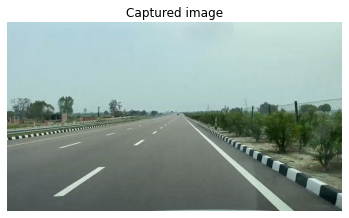

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Captured image")

Text(0.5, 1.0, 'Edge Detection')

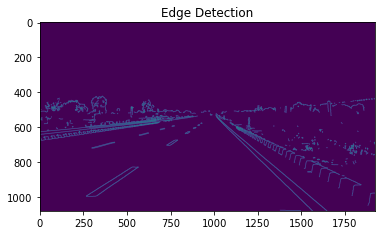

In [7]:
plt.imshow(canny(img))
plt.title("Edge Detection")

Text(0.5, 1.0, 'ROI selection')

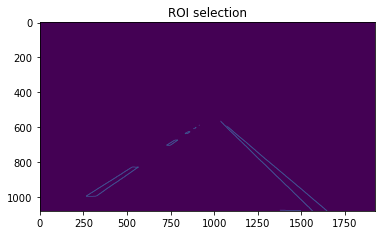

In [8]:
ROI_masked= roi(canny(img))
plt.imshow(ROI_masked)
plt.title("ROI selection")

Text(0.5, 1.0, 'Hough Transform-lane detection')

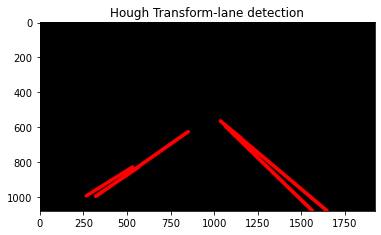

In [9]:
lines = cv2.HoughLinesP(ROI_masked,2, np.pi/180, threshold=140,lines=np.array([]),minLineLength=70, maxLineGap=190)
lineImg = disp_lines(img, lines)

plt.imshow(lineImg)

plt.title("Hough Transform-lane detection")


Text(0.5, 1.0, 'Hough Transform-lane detection')

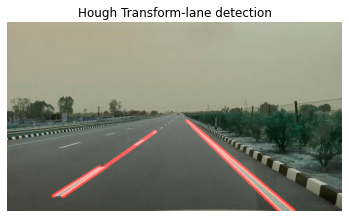

In [10]:
combined_lines= cv2.addWeighted(img, 0.8, lineImg, 1.1,1)
plt.imshow(combined_lines)
plt.axis('off')
plt.title("Hough Transform-lane detection")

Text(0.5, 1.0, 'Averaged-Extrapolated lines')

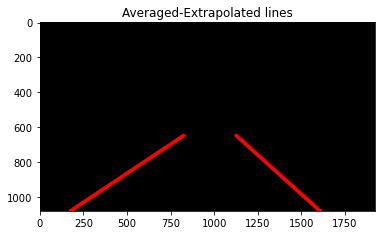

In [11]:
avg_line = avg_slope_intercept(img, lines)
avg_lineImg = disp_lines(img, avg_line)
plt.imshow(avg_lineImg)
plt.title("Averaged-Extrapolated lines")

Text(0.5, 1.0, 'Lane Detection')

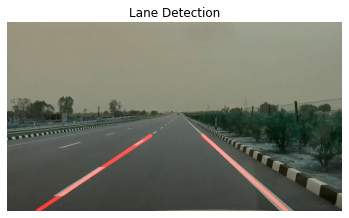

In [12]:
combined_avg= cv2.addWeighted(img, 0.7, avg_lineImg, 1.1,1)
plt.imshow(combined_avg)
plt.axis('off')
plt.title("Lane Detection")